<a href="https://colab.research.google.com/github/sahug/python-data-structure/blob/main/Data%20Structure%20-%20Recursion%20and%20Dynamic%20Programing%20-%20Cracking%20Coding%20Interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Structure - Recursion and Dynamic Programing - Cracking Coding Interview**

**Triple Step**: A child is running up a staircase with n steps and can hop either 1 step, 2 steps, or 3 steps at a time, implement a method to count how many possible ways the child can run up the stairs.

**Steps**

1) Calcultae the ways for only 1 step. [1] = f(1) = 1 way

2) Calcultae the ways for 2 steps. [1, 1][2] = f(2) = 2 ways

3) Calcultae the ways for 3 steps. [1, 1, 1][2, 1][1, 2][3] = f(3) = 4 ways

4) Calcultae the ways for 4 steps. [1, 1, 1, 1][2, 1, 1][1, 2, 1][1, 1, 2][2, 2][3, 1][1, 3] = f(4) = 7 ways

Now, if we look at the pattern we see that the next step taken includes the steps taken previously.

**3 Steps**

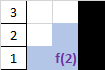

**Step 4**

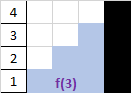

This can help us set a pattern.

f(0) = 1

f(1) = 1

f(2) = 2 ways = f(1) + f(0)

f(3) = 4 ways = f(2) + f(1) + f(0)

f(4) = 7 ways = f(3) + f(2) + f(1)

f(5) = 13 ways = f(4) + f(3) + f(2)

f(n) = f(n-1) + f(n-2) + f(n-3)

In [ ]:
def tripleStep(n) :
  if n == 0 or n == 1: return 1    
  total = 0
  for i in [1, 2, 3]:
    if n-1 > 0: 
      total += tripleStep(n-i)  
  return total

In [ ]:
print(tripleStep(1))
print(tripleStep(2))
print(tripleStep(3))
print(tripleStep(4))
print(tripleStep(5))
print(tripleStep(6))

1
2
4
7
13
24


**Robot in a Grid**: Imagine a robot sitting on the upper left corner of grid with r rows and c columns. The robot can only move in two directions, right and down, but certain cells are "off limits" such that the robot cannot step on them. Design an algorithm to find a path for the robot from the top left to 
the bottom right.

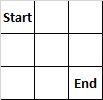

Steps - 

1) For only 1 grid. No of ways = 1

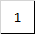

2) For 2x2 grid. No of ways = 2

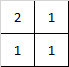

3) For 3x3 grid No of ways = 6

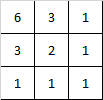

3) For 4x4 grid No of ways = 20

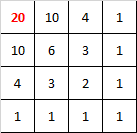

What the pattern tell us is that to get from the start to end the now of ways is sum of 1 rows below and 1 column ahead. i.e for 4x4 we have 10 + 10 = 20. The value of each grid is calculated in same way. 1 row below and 1 column ahead.

In [ ]:
def robotInGrid(m, n):
  grid = [1]*n

  for i in range(m-1):
    newRow = [1]*n
    for j in range(n-2, -1, -1):
      newRow[j] = newRow[j+1] + grid[j]
    grid = newRow
  return grid[0]

print(robotInGrid(3, 3))
print(robotInGrid(4, 4))
print(robotInGrid(5, 5))

6
20
70


**Magic Index**: A magic index in an array A[0. . .n-1 ] is defined to be an index such that A[i ] = i. Given a sorted array of distinct integers, write a method to find a magic index, if one exists, in array A.

**Brute Force Way**

In [ ]:
def magicIndex(arr):
  for i in arr:
    if i >= 0 and i < len(arr):
      if i == arr[i]:
        return True
  return False

A = [-1, 0, 20, 30, 40, 50, 60, 70, 80, 90]
print(magicIndex(A))

A = [-1, 0, 2, 3, 4, 50, 60, 70, 80, 90]
print(magicIndex(A))

False
True


**Recursion**

In [ ]:
def magicIndex(arr, start=0, end=None):
  end = end or len(arr) -1
  mid = int((start + end) / 2)
  val = arr[mid]
  i = mid

  if end < start:
    return None

  if val == i:
    return i

  if val > i:
    #If mid value is greater than mid index. We can find the lower value = lower index in 1st half of array.
    return magicIndex(arr, start, mid - 1)

  #If mid value is lesser than mid index. We can find the higher value = higher index in 2nd half of array.
  return magicIndex(arr, mid + 1, end)

print(magicIndex([-1, 0, 2, 3, 5, 6, 7]) == 3)
print(magicIndex([-1, 0, 2, 4, 5, 6, 7]) == 2)
print(magicIndex([-1, -1, -1, -1, -1, -1, -1]) is None)

True
True
True


**Power Set**: Write a method to return all subsets of a set.

Set A is said to be a subset of Set B if all the elements of Set A are also present in Set B

In [ ]:
def power_set(s):
  start = 0
  end = len(s)
  subset = [[]]

  # Brute Force
  # for i in range(start, end):    
  #   subset.append([s[i]])
  #   for j in range(i+1, end):
  #     if [s[i], s[j]] not in subset:
  #       subset.append([s[i], s[j]])
  
  # Better way
  for i in s:
    subset += [lst + [i] for lst in subset]
  return subset

s = [1, 2, 3]
power_set(s)

[[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]

**Recursive Multiply**: Write a recursive function to multiply two positive integers without using the * operator. You can use addition, subtraction, and bit shifting, but you should minimize the number of those operations. 

In [ ]:
class RecursiveMultiply:

  def multiplyIter(self, i, j):
    sum = 0
    
    if i==0 or j==0:
      return 0

    for k in range(0, j):
      sum += i
    return sum

  def multiplyRec(self, i, j):
    
    if i==0 or j==0:
      return 0

    return self.multiplyRec(i-1, j) + j


In [ ]:
recursiveMultiply = RecursiveMultiply()
print(recursiveMultiply.multiplyIter(2, 10))
print(recursiveMultiply.multiplyRec(2, 10))

20
20


**Towers of Hanoi:** In the classic problem of the Towers of Hanoi, you have 3 towers and N disks of different sizes which can slide onto any tower. The puzzle starts with disks sorted in ascending order of size from top to bottom (i.e., each disk sits on top of an even larger one). You have the following 
constraints: 

(1) Only one disk can be moved at a time. 

(2) A disk is slid off the top of one tower onto another tower. 

(3) A disk cannot be placed on top of a smaller disk. 

Write a program to move the disks from the first tower to the last using stacks. 

In [ ]:
class TowerOfHanoi:

  def moveDisksItr(self, disks):
    t2 = []
    t3 = []

    for i in range(len(disks)-1, -1, -1):
      t2.append(disks[i])
    
    for i in range(len(t2)-1, -1, -1):
      t3.append(t2[i])

    print("T1", disks)
    print("T2", t2)
    print("T3", t3)

  def moveDisksRec(self, disk, tower):
        
    tower -= 1    
    
    disk.reverse()
    
    if tower == 0:    
      return "T3", disk
          
    return self.moveDisksRec(disk, tower)

disks = [1, 2, 3, 4]
towerOfHanoi = TowerOfHanoi()
towerOfHanoi.moveDisksItr(disks)
towerOfHanoi.moveDisksRec(disks, 3)

T1 [1, 2, 3, 4]
T2 [4, 3, 2, 1]
T3 [1, 2, 3, 4]


('T3', [4, 3, 2, 1])

**Backtracking**
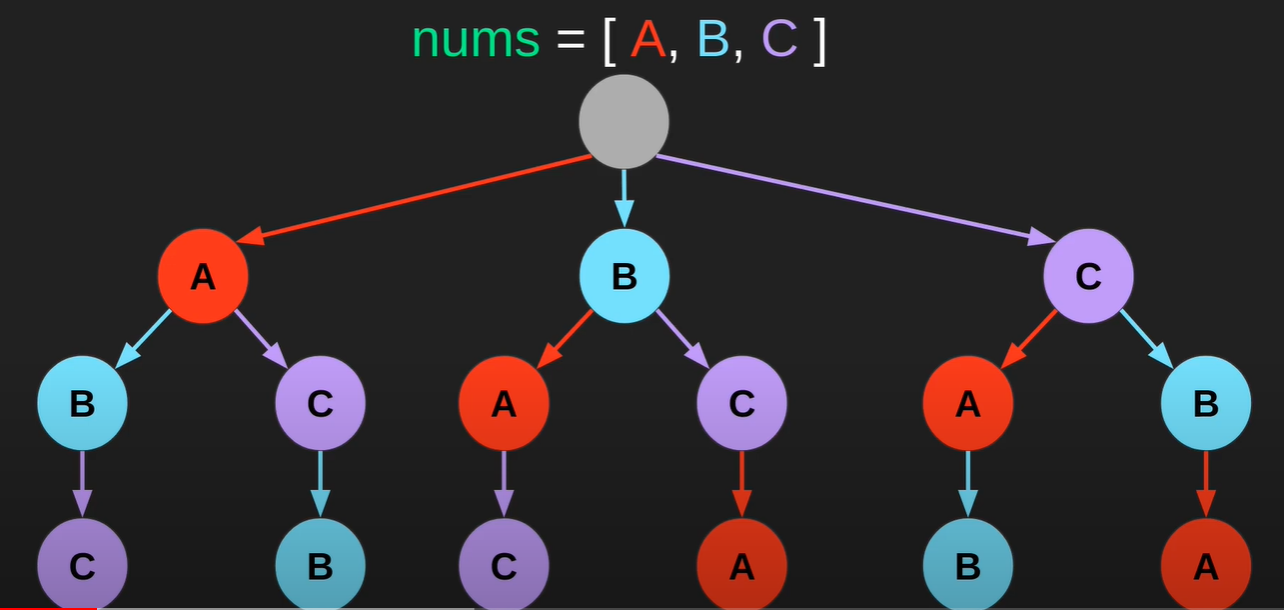

Three steps in Backtracking
- Choice
- Constraints
- Goal

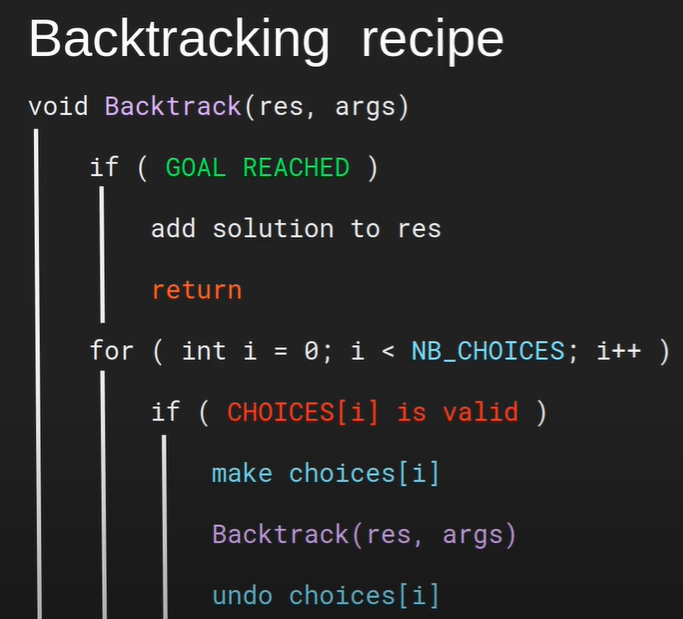

**Permutations without Dups**: Write a method to compute all permutations of a string of unique characters. 

`nPr = n!/(n-r)!`

In [ ]:
class Permutation:

  def perm(self, word):

    #base case
    if(len(word) == 1):
      print(word)
      return [word]
    
    perms = self.perm(word[1:])    
    char = word[0]    
    result = []

    for perm in perms:
      for i in range(len(perm) + 1):
        result.append(perm[:i] + char + perm[i:])
    return result

permutation = Permutation()
permutation.perm("ABC")

C


['ABC', 'BAC', 'BCA', 'ACB', 'CAB', 'CBA']

**Permutations with Dups**:Write a method to compute all permutations of a string whose characters are not necessarily unique. The list of permutations should not have duplicates.

`nPr = n^r`

In [ ]:
from typing import List
class Permutation:

  def perm(self, word)-> List[List[str]]:
    res = []
    perm = []
    count = {n:0 for n in word}
    for n in word:
      count[n] += 1

    def dfs():
      if len(perm) == len(word):
        res.append(perm.copy())
        return

      for n in count:
        if count[n] > 0:
          perm.append(n)
          count[n] -= 1
          dfs()

          count[n] += 1
          perm.pop()
    
    dfs()
    return res

permutation = Permutation()
permutation.perm("AAC")

[['A', 'A', 'C'], ['A', 'C', 'A'], ['C', 'A', 'A']]

**Parenthesis** Implement an algorithm to print all valid (e.g., properly opened and closed) combinations of n pairs of parentheses. 

```
Input: n=2
Output: 
{}{}
{{}}
```

**Rules:**

- Only add open paranthesis if open < n
- Only add a closing paranthesis if closed < open
- Valid if open == closed == n

We can see these rules applied in below diagram.

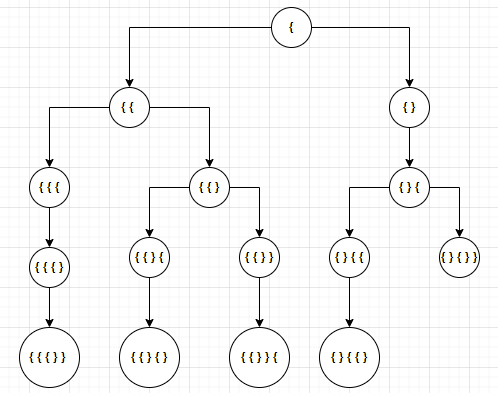

In [ ]:
class Parenthesis:
  
  def generateParenthesis(self, n):

    stack = []
    result = []

    def backtrack(openN, closedN):

      if openN == closedN == n:
        result.append("".join(stack))
        return

      if openN < n:
        stack.append("{")
        backtrack(openN + 1, closedN)
        stack.pop()

      if closedN < openN:
        stack.append("}")
        backtrack(openN, closedN + 1)
        stack.pop()
  
    backtrack(0, 0)

    return result

parenthesis = Parenthesis()
parenthesis.generateParenthesis(3)

['{{{}}}', '{{}{}}', '{{}}{}', '{}{{}}', '{}{}{}']

**Paint Fill**: Implement the "paint fill" function that one might see on many image editing programs. That is, given a screen (represented by a two-dimensional array of colors), a point, and a new color, fill in the surrounding area until the color changes from the original color. 